<a href="https://colab.research.google.com/github/PatoTlax/house_price/blob/main/Houses_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
files.upload()
df = pd.read_csv('houses.csv')

Saving houses.csv to houses (1).csv


# **EDA**

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **Correlation**

In [7]:
corrmat = df.corr()
corrmat

<ipython-input-7-6f7dac871a77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

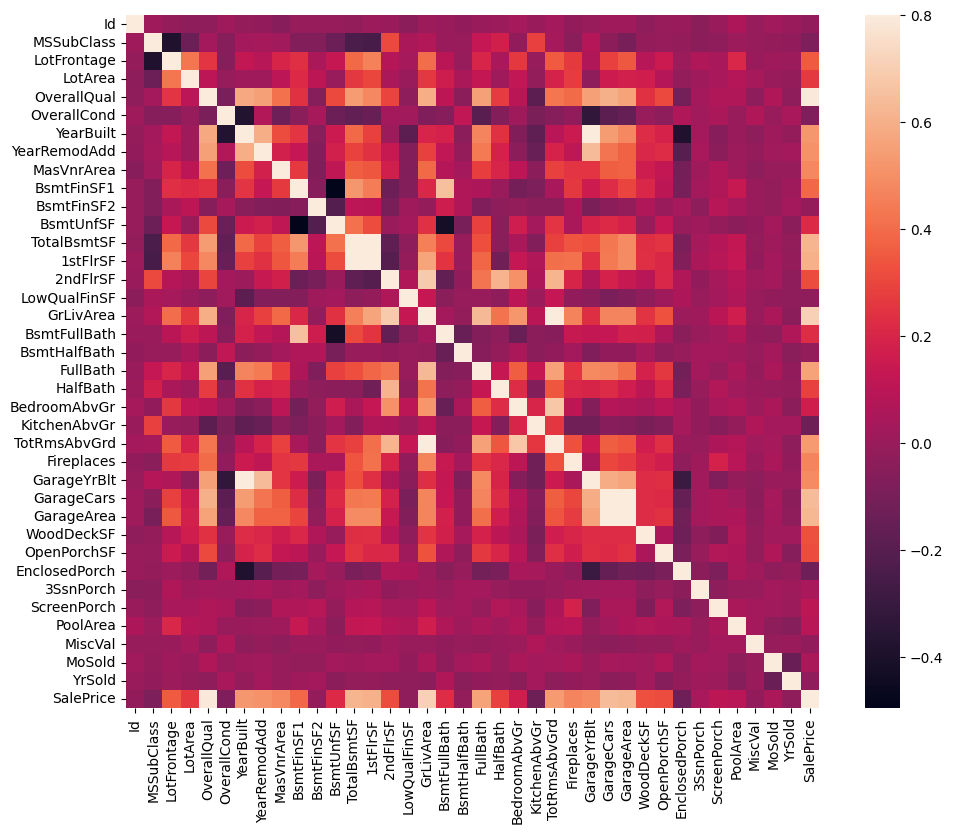

In [8]:
# HeatMap
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)

**10 Variables with greater correlation**

In [9]:
k = 10 # Número de datos que queremos ver
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #Variable que muestra los datos con mayor correlación
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [10]:
cm = np.corrcoef(df[cols].values.T) #Transponer columnas para HeatMap
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

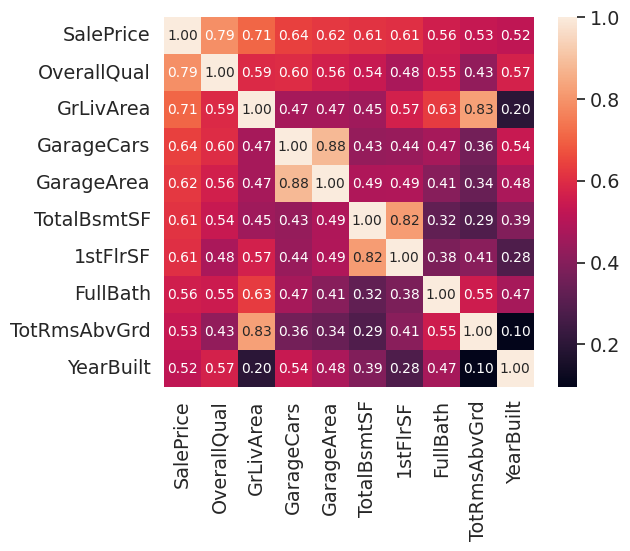

In [11]:
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size' : 10},
                 yticklabels = cols.values,
                 xticklabels = cols.values)
plt.show()

In [12]:
df2 = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
df2.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


# **Checking Outliers in some Correlated Values**

(-0.5, 111.5, 0.0, 800000.0)

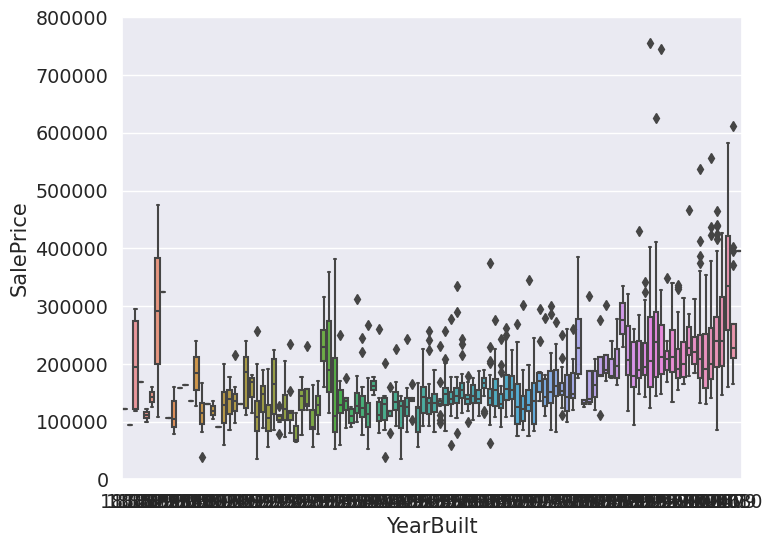

In [13]:
var = 'YearBuilt'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 9.5, 0.0, 800000.0)

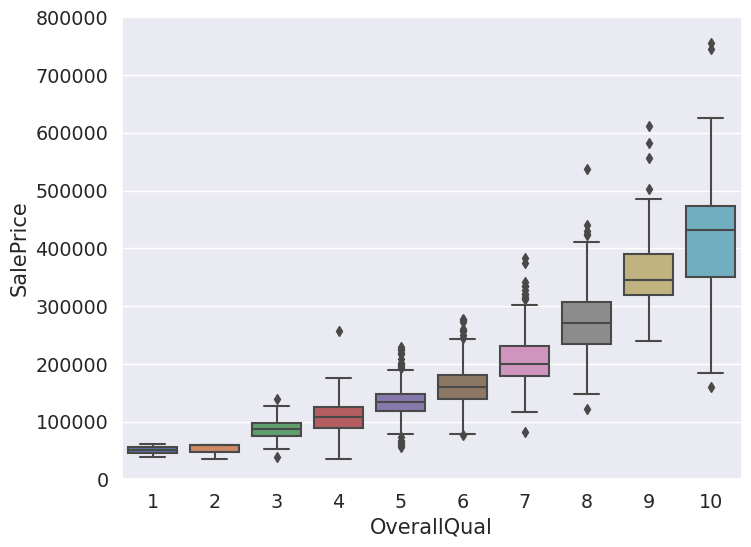

In [14]:
var = 'OverallQual'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 860.5, 0.0, 800000.0)

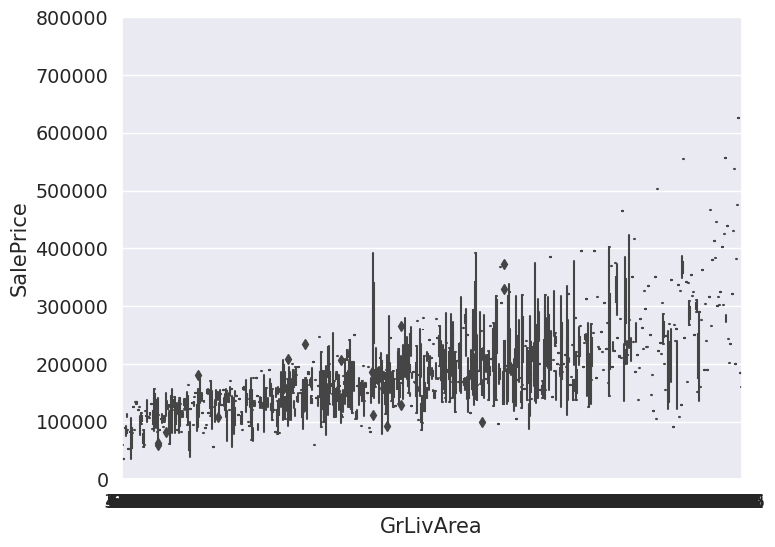

In [15]:
var = 'GrLivArea'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 4.5, 0.0, 800000.0)

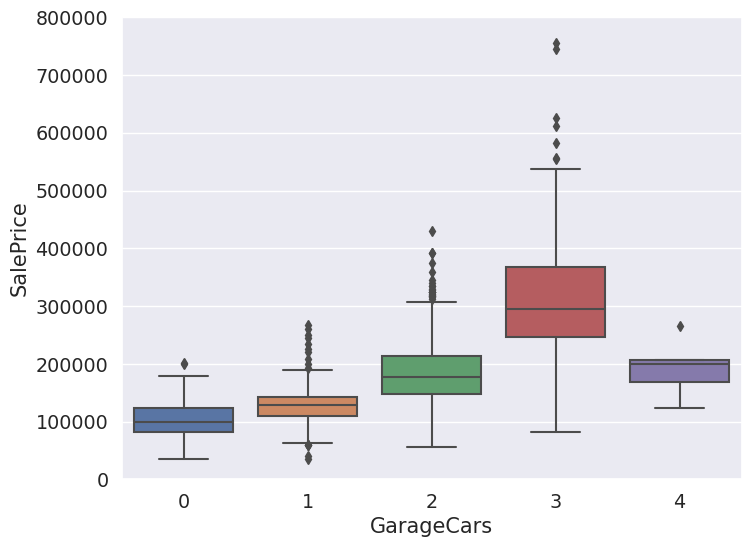

In [16]:
var = 'GarageCars'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 440.5, 0.0, 800000.0)

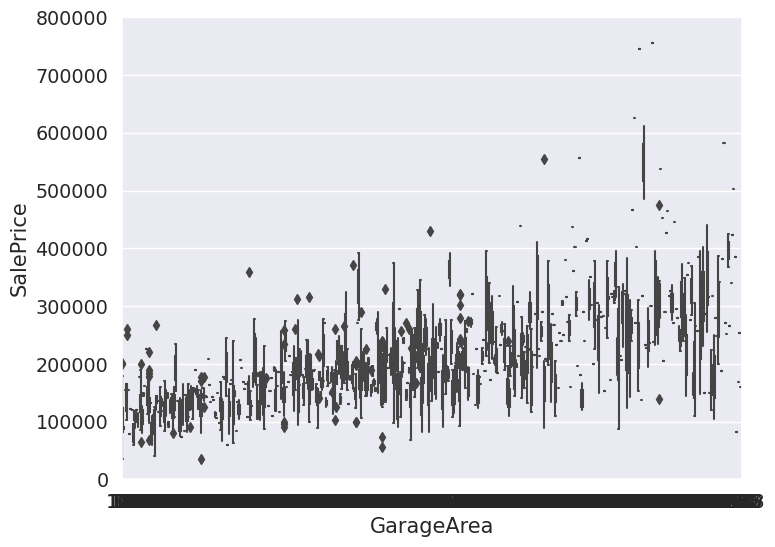

In [17]:
var = 'GarageArea'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 3.5, 0.0, 800000.0)

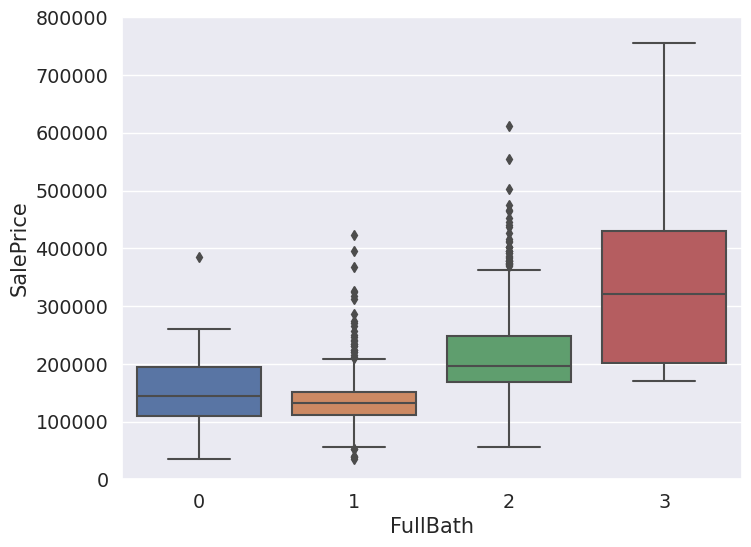

In [18]:
var = 'FullBath'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 11.5, 0.0, 800000.0)

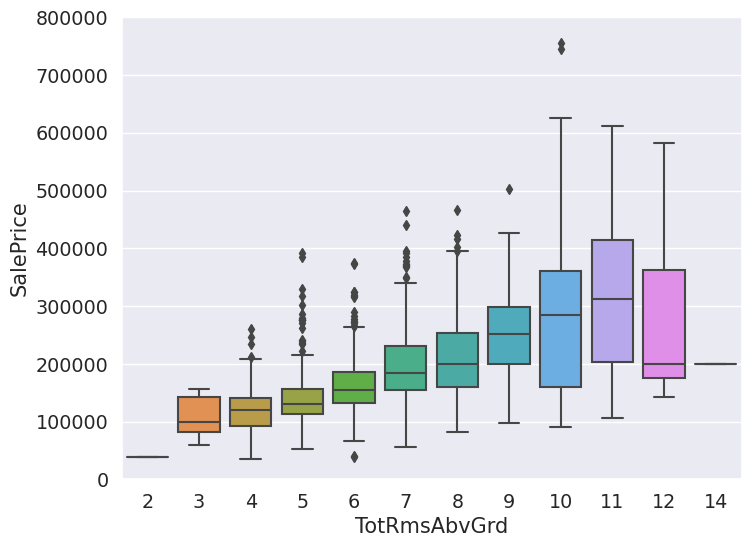

In [19]:
var = 'TotRmsAbvGrd'
data = pd.concat([df2['SalePrice'], df2[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

# **PYCARET**

In [ ]:
!pip install pycaret

In [21]:
from pycaret.regression import *

**Get Data Train**

In [22]:
data_train = df2.sample(frac = 0.8, random_state = 786)

In [23]:
data_train.shape

(1168, 10)

**Get Data Test**

In [24]:
data_test = df2.drop(data_train.index)

In [25]:
data_test.shape

(292, 10)

**Overwriting index**

In [26]:
data_train.reset_index(drop = True, inplace = True)
data_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,125000,6,752,1,264,744,752,1,4,1984
1,84900,4,930,1,308,0,930,1,6,1946
2,138887,5,1784,1,180,747,892,1,9,1914
3,112000,6,1902,2,539,0,1318,2,8,1978
4,130500,5,816,1,264,816,816,1,5,1982


In [27]:
data_test.reset_index(drop = True, inplace = True)
data_test.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,140000,7,1717,3,642,756,961,1,7,1915
1,143000,5,1362,2,480,796,796,1,5,1993
2,200000,7,2090,2,484,1107,1107,2,7,1973
3,345000,9,2324,3,736,1175,1182,3,11,2005
4,144000,5,912,1,352,912,912,1,4,1962


In [28]:
reg = setup(data = data_train, target = 'SalePrice', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 10)"
4,Transformed data shape,"(1168, 10)"
5,Transformed train set shape,"(817, 10)"
6,Transformed test set shape,"(351, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [29]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,21142.4174,1052389285.7374,31640.7857,0.8165,0.1689,0.1263,0.4110
rf,Random Forest Regressor,20821.8948,1095619363.9020,31976.3555,0.8107,0.1682,0.1242,0.2430
et,Extra Trees Regressor,20983.5127,1123742676.3077,32495.3266,0.8072,0.1690,0.1250,0.1700
gbr,Gradient Boosting Regressor,20662.6618,1138122618.9316,32143.7786,0.8046,0.1651,0.1221,0.1840
xgboost,Extreme Gradient Boosting,22447.1176,1284309389.3640,34622.4550,0.7772,0.1797,0.1334,0.0790
ridge,Ridge Regression,23632.3350,1319100080.5395,35441.3292,0.7741,0.2001,0.1444,0.0450
llar,Lasso Least Angle Regression,23636.8078,1319180996.7374,35442.5070,0.7740,0.2001,0.1445,0.0330
br,Bayesian Ridge,23542.1222,1319110092.9312,35439.6804,0.7740,0.1998,0.1433,0.0300
lasso,Lasso Regression,23636.8078,1319180996.6729,35442.5070,0.7740,0.2001,0.1445,0.0420
lr,Linear Regression,23637.2201,1319195457.0673,35442.7144,0.7740,0.2001,0.1445,0.7000


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [30]:
lbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24133.5061,2361574479.0478,48596.0336,0.6205,0.1946,0.1346
1,20819.7425,854772467.0042,29236.4920,0.8056,0.1903,0.1423
2,18596.5627,610117517.1651,24700.5570,0.9026,0.1685,0.1272
3,22754.2760,1100274427.2592,33170.3848,0.8389,0.1828,0.1356
4,21072.4676,802877950.2453,28335.1010,0.8090,0.1729,0.1274
5,18132.3423,499544832.3657,22350.4996,0.8717,0.1472,0.1152
6,20040.4566,1070667921.4124,32721.0624,0.8620,0.1259,0.1002
7,19147.6807,663248294.7955,25753.6074,0.8374,0.1317,0.1035
8,23345.0993,1217741127.2130,34896.1477,0.8244,0.1831,0.1414


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
print(lbm)

LGBMRegressor(n_jobs=-1, random_state=123)


In [32]:
tuned_lbm = tune_model(lbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24155.7534,1977688164.0944,44471.2060,0.6822,0.1867,0.1321
1,23079.6123,1021011271.3159,31953.2670,0.7678,0.1963,0.1524
2,18551.0103,696713144.6857,26395.3243,0.8888,0.1768,0.1260
3,22388.7645,1361807188.4772,36902.6718,0.8007,0.1975,0.1391
4,22695.8069,929177251.6832,30482.4089,0.7790,0.1791,0.1377
5,19995.5835,659314510.0203,25677.1204,0.8306,0.1573,0.1237
6,24205.7402,1501079024.8828,38743.7611,0.8065,0.1547,0.1206
7,20095.4506,730019989.9577,27018.8821,0.8211,0.1404,0.1111
8,24063.4298,1043301096.8713,32300.1718,0.8496,0.1876,0.1465


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [33]:
print(lbm)

LGBMRegressor(n_jobs=-1, random_state=123)


In [34]:
unseen_predictions = predict_model(tuned_lbm, data = data_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17986.0530,825418085.1884,28730.0902,0.8750,0.1455,0.1069


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,SalePrice,prediction_label
0,7,1717,3,642,756,961,1,7,1915,140000,175677.081848
1,5,1362,2,480,796,796,1,5,1993,143000,144687.118033
2,7,2090,2,484,1107,1107,2,7,1973,200000,243770.655606
3,9,2324,3,736,1175,1182,3,11,2005,345000,357274.503589
4,5,912,1,352,912,912,1,4,1962,144000,113595.864839


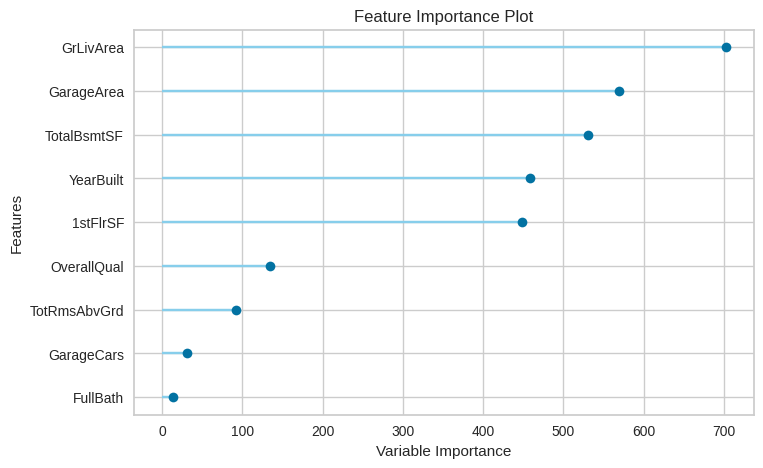

In [35]:
plot_model(tuned_lbm, plot = 'feature')

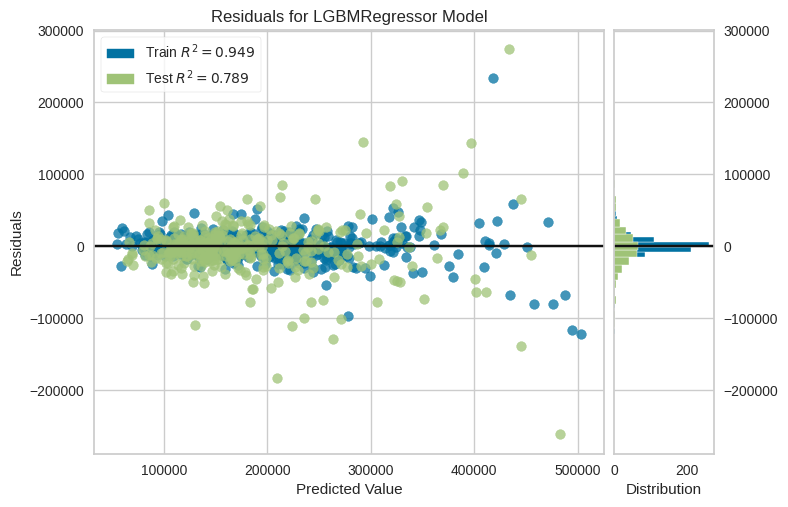

In [36]:
plot_model(tuned_lbm, plot = 'residuals')

In [37]:
evaluate_model(tuned_lbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…